Model prediction by knn K nearest neighbour algorithm

In [3]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report,ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder 
import pandas as pd
import numpy as np
le = LabelEncoder()
#importing required csv
data=pd.read_csv("/content/cars_engage.csv")
#filling the error values
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.fillna(999, inplace=True)
#encoding data
encoded_data = pd.get_dummies(data, columns = ['Make','Variant','Ex-Showroom_Price','Displacement','Cylinders','Valves_Per_Cylinder','Drivetrain','Cylinder_Configuration','Emission_Norm','Engine_Location','Fuel_System','Fuel_Tank_Capacity','Fuel_Type','Height','Length','Width'])
encoded_data['Model']=le.fit_transform(encoded_data['Model'])
X = encoded_data.drop('Model', axis=1)
y = encoded_data['Model']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=42)
from sklearn.neighbors import KNeighborsClassifier
#k value for nearest neighbour
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train.values.ravel())
pred = knn.predict(X_test)
#printing results
print(classification_report(y_test,pred, zero_division=1))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.00      1.00      0.00         0
           2       1.00      0.00      0.00         1
           4       1.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      1.00      0.00         0
           7       1.00      0.00      0.00         1
           9       0.00      1.00      0.00         0
          10       0.00      1.00      0.00         0
          11       1.00      0.00      0.00         1
          12       1.00      0.00      0.00         1
          15       1.00      0.00      0.00         1
          20       0.60      1.00      0.75         3
          22       1.00      0.00      0.00         4
          23       0.50      1.00      0.67         3
          24       1.00      0.00      0.00         2
          25       1.00      1.00      1.00         4
          26       0.50    

Apriori analysis of features of car

In [7]:
!pip install apyori
#import the required libraries
import pandas as pd
from apyori import apriori
#read the data using pandas
data=pd.read_csv("/content/cars_engage.csv")
#list for storing records
records = []
for i in range(2, 300):
   records.append([str(data.values[i,j]) for j in range(0,18)])
print(records)
#passing the records to find association_reults
association_rules= apriori(records, min_suport = 0.0001, min_confidence =
0.01, min_lift = 3, min_length = 2, max_length = 2)
association_results = list(association_rules)
#printing the results
print("\n")
print("Association results:")
print(len(association_results))
print(association_results)
def results_add_this(output):
  Item= [tuple(result[2][0][0])[0] for result in output]
  Item_add= [tuple(result[2][0][1])[0] for result in output]
  return list(zip(Item,Item_add))
output_DataFrame = pd.DataFrame(results_add_this(association_results), columns =
['Item', 'Item_add'])
output_DataFrame

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=4a30732fb052fd93a08d0c37ca35b2d2065bce48500551f93afd19697d280b0b
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori
[['2', 'Tata', 'Nano Genx', 'Emax Xm', 'Rs. 2,96,661', '624 cc', '2.0', '2.0', 'RWD (Rear Wheel Drive)', 'In-line', 'BS IV', 'Rear, Transverse', 'Injection', '15 litres', 'CNG', '1652 mm', '3164 mm', '1750 mm'], ['3', 'Tata', 'Nano Genx', 'Xta', 'Rs. 3,34,768', '624 cc', '2.0', '2.0', 'RWD (Rear Wheel Drive)', 'In-line', 'BS IV', 'Rear, Transverse', 'Injection', '24 litres', 'Petrol', '1652 mm', '3164 mm', '1750 mm'], ['4', 'Tata', 'Nano Genx', 'Xm', 'Rs. 2,72,223', '624 cc', '2.0', '2.0', 'RWD (Rear Wheel Drive)', 'In-line', 'BS IV', 'Rear, Transverse', 'Injection', '24 litres', 'Petrol', '1652 mm', '3164 mm', 

,Item,Item_add
0,3.0,35 litres
1,37 litres,3995 mm
2,45 litres,Toyota


Linear regression to find relation between number of cylinders and valves per cylinder

Coefficient of determination 0.40430381056985054


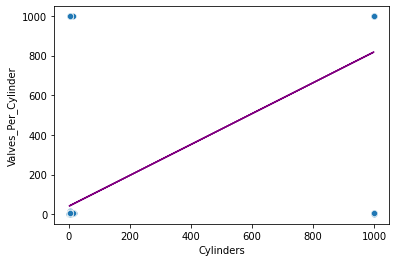

In [4]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import csv
data=pd.read_csv("/content/cars_engage.csv")
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.fillna(999, inplace=True)
x=data.iloc[:, 6].values.reshape(-1,1)#cylinders
y=data.iloc[:, 7].values.reshape(-1,1)#valves per cylinder
#display scatter graph
sns.scatterplot(x=data['Cylinders'],y=data['Valves_Per_Cylinder'], data=data)
#split train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

from sklearn.linear_model import LinearRegression
regressor=LinearRegression
model=LinearRegression().fit(x,y)
y_pred=model.predict(x)
plt.plot(x, y_pred, color = "purple")
#check score of the model
r_sq=model.score(x,y)
print("Coefficient of determination",r_sq)

Determination of Optimal value of k clusters that can be formed out of dataset

Text(0, 0.5, 'Error Rate')

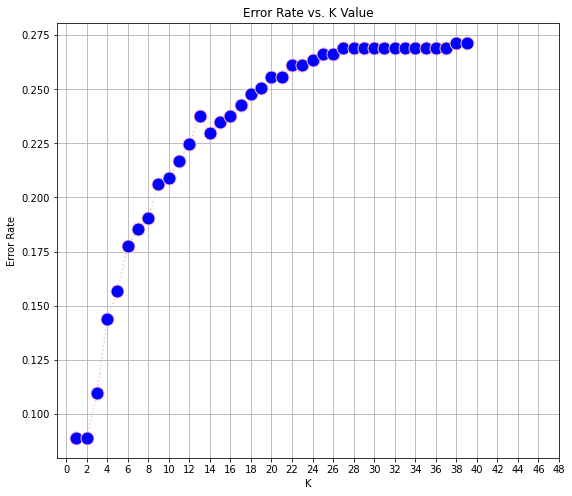

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 
import pandas as pd
#read the data using pandas
data=pd.read_csv("/content/cars_engage.csv")
error_rate = []
le = LabelEncoder()
#replacing error values
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.fillna(999, inplace=True)
#encoded data
encoded_data = pd.get_dummies(data, columns = ['Make','Variant','Ex-Showroom_Price','Displacement','Cylinders','Valves_Per_Cylinder','Drivetrain','Cylinder_Configuration','Emission_Norm','Engine_Location','Fuel_System','Fuel_Tank_Capacity','Fuel_Type','Height','Length','Width'])
encoded_data['Model']=le.fit_transform(encoded_data['Model'])
x = encoded_data.drop('Model', axis=1)
y = encoded_data['Model']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i,weights='distance')
    knn.fit(x_train,y_train.values.ravel())
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test.values.ravel()))
#plotting the graph
plt.figure(figsize=(9,8))
plt.plot(range(1,40),error_rate,color='pink', linestyle='dotted', marker='o',
         markerfacecolor='blue', markersize=13)
plt.xticks(np.arange(0,50,2))
plt.grid()
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
